# Auto Annotate by trained model

Yolo の機能の一つに SAM を使った自動 Annotation がある
トレーニング済みのモデルと SAM のモデルを指定すると、それを使って画像に対してラベリングができる
中の処理的には、Yolo を使って検知したモデルを SAM で Segmentation して Annotation として出力している感じ

最初に適当なモデルを作ってから学習データを増やすような用途に向いている。

In [3]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="../images", det_model="../models/yolov8n-seg.pt", sam_model='sam_b.pt', output_dir="images_labels")


image 1/1 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\images\sample.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


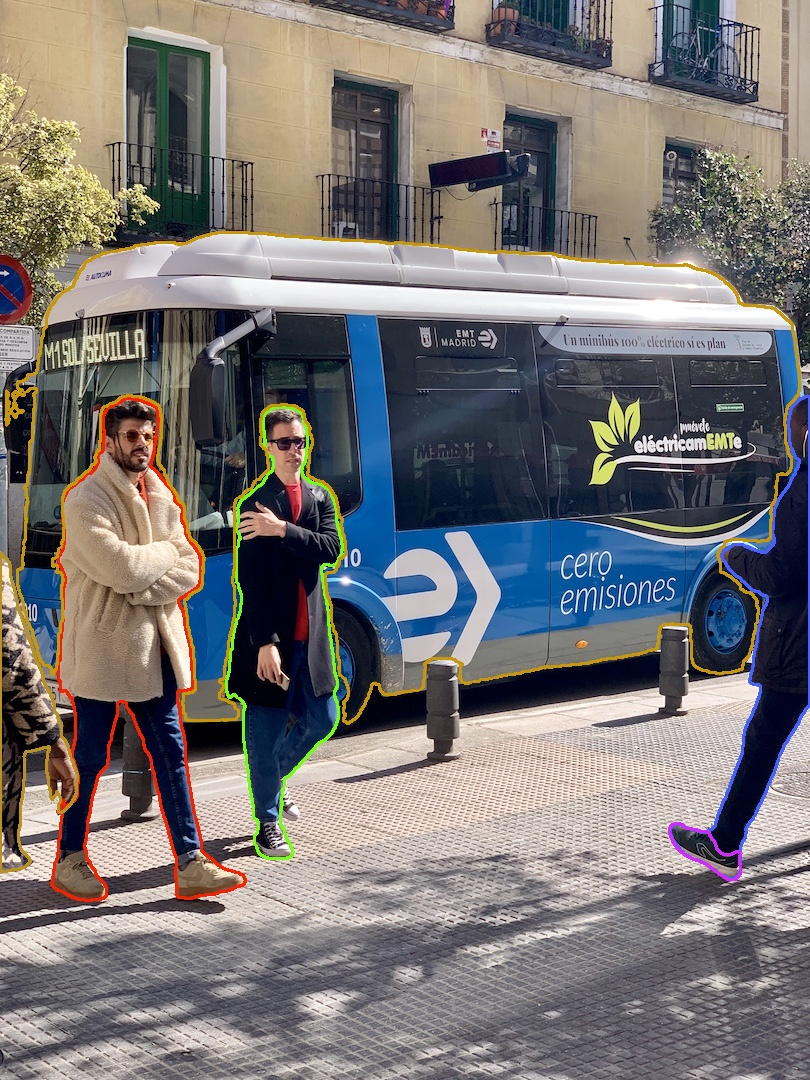

: 

In [3]:
import cv2
import numpy as np
from random import randint
from IPython.display import display, Image

with open('../images_labels/sample.txt', 'r') as f:
    labels = f.read().splitlines()
img = cv2.imread('../images/sample.jpg')
h,w = img.shape[:2]

for label in labels:
    class_id, *poly = label.split(' ')

    poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
    poly *= [w,h] # Unscale

    cv2.polylines(img, [poly.astype('int')], True, (randint(0,255),randint(0,255),randint(0,255)), 2) # Draw Poly Lines
    # cv2.fillPoly(img, [poly.astype('int')], (randint(0,255),randint(0,255),randint(0,255)), cv2.LINE_AA) # Draw area


_, buf = cv2.imencode(".jpg", img)
display(Image(data=buf.tobytes()))
